<a href="https://colab.research.google.com/github/Nancy-Shi/Complex_Networks/blob/main/061223_Configuration_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Configuration Model**
The model randomly assigns edges based on the degree sequence.

In [12]:
import networkx as nx
import matplotlib.pyplot as plt

In [13]:
## sequence returns a degree sequence for a tree with a power law distribution.
## random_powerlaw_tree_sequence(n, gamma=3, seed=None, tries=100)
## n is number of nodes, gamma is the exponent of the power law,
## tries is the number of attempts to adjust the sequence to make it a tree.

sequence = nx.random_powerlaw_tree_sequence(100, tries = 5000)
G = nx.configuration_model(sequence)

In [14]:
len(G)

100

In [15]:
actual_degrees = [d for v, d in G.degree()]

In [16]:
actual_degrees == sequence

True

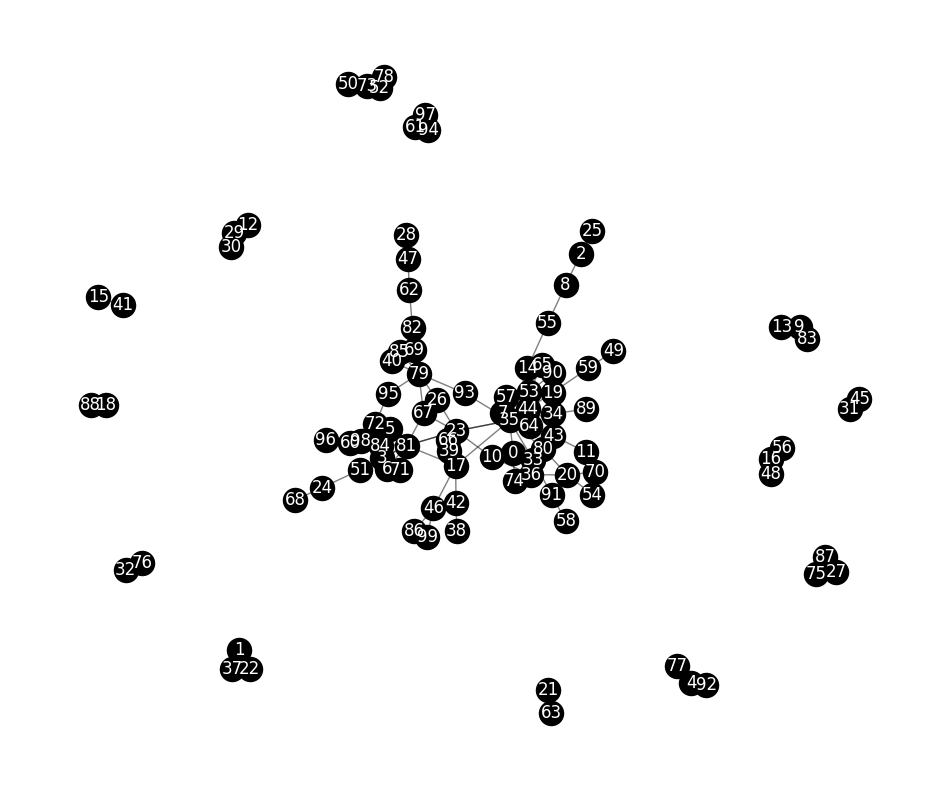

In [17]:
pos = nx.fruchterman_reingold_layout(G);

plt.figure(figsize=(12,10));
plt.axis("off");
nx.draw_networkx_nodes(G, pos, node_size=300, node_color="black");
nx.draw_networkx_edges(G, pos, alpha=0.500);
nx.draw_networkx_labels(G, pos, font_color="white");
plt.show();

In [18]:
## Build my own configuration model
import numpy as np
import math as math

def generate_degree_sequence(n, gamma, kmin):
    """
    Generates a degree sequence of length n following a power law distribution.

    Parameters:
        n (int): Length of the degree sequence.
        gamma (float): Exponent of the power law distribution (gamma > 1).
        kmin (int): Minimum degree value in the sequence.

    Returns:
        list: Degree sequence following a power law distribution.
    """

    # Generate a random sample from the power law distribution
    # by mapping the uniform distribution to power law distribution
    u = np.random.uniform(size=n)
    degrees = np.ceil((1.0 - u) ** (-1.0 / (gamma - 1.0)))

    # Adjust degrees based on the minimum and maximum degree values (kmin, kmax)
    kmax = int(math.sqrt(n))
    degrees = [int(degree) for degree in degrees if degree >= kmin and degree <= kmax]

    # Truncate or pad the sequence to match the desired length
    degrees = degrees[:n] if len(degrees) >= n else degrees + [kmin] * (n - len(degrees))

    return degrees


Degree sequence: [4, 5, 3, 4, 3, 4, 3, 5, 4, 4, 5, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
Average degree: 3.3666666666666667


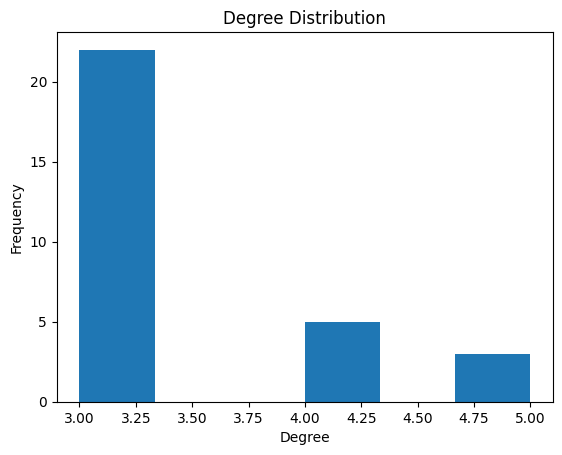

In [19]:
## Test 1:
n = 30
gamma = 2.5
kmin = 3

degree_sequence = generate_degree_sequence(n, gamma, kmin)
print("Degree sequence:", degree_sequence)

# Calculate and print the average degree
average_degree = sum(degree_sequence) / n
print("Average degree:", average_degree)

# Plot the degree distribution histogram
import matplotlib.pyplot as plt
plt.hist(degree_sequence, bins='auto')
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.title("Degree Distribution")
plt.show()

Degree sequence: [3, 3, 3, 7, 4, 3, 3, 6, 4, 3, 4, 3, 7, 3, 3, 3, 3, 3, 3, 6, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
Average degree: 3.3


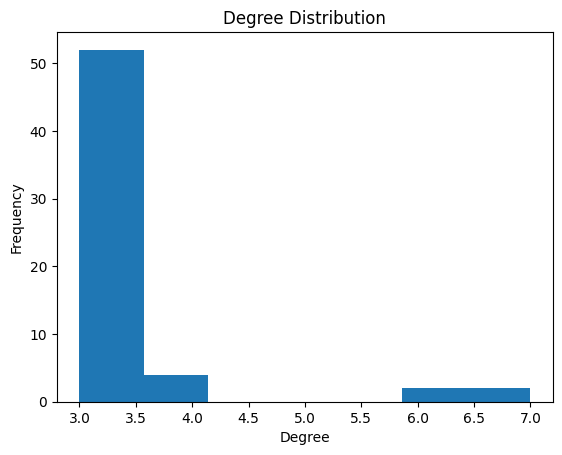

In [23]:
## Test 2:
n = 60
gamma = 2.3
kmin = 3

degree_sequence = generate_degree_sequence(n, gamma, kmin)
print("Degree sequence:", degree_sequence)

# Calculate and print the average degree
average_degree = sum(degree_sequence) / n
print("Average degree:", average_degree)

# Plot the degree distribution histogram
import matplotlib.pyplot as plt
plt.hist(degree_sequence, bins='auto')
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.title("Degree Distribution")
plt.show()

Degree sequence: [3, 8, 3, 3, 3, 5, 3, 3, 3, 3, 3, 3, 10, 3, 3, 3, 5, 3, 3, 3, 5, 6, 5, 7, 5, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
Average degree: 3.3


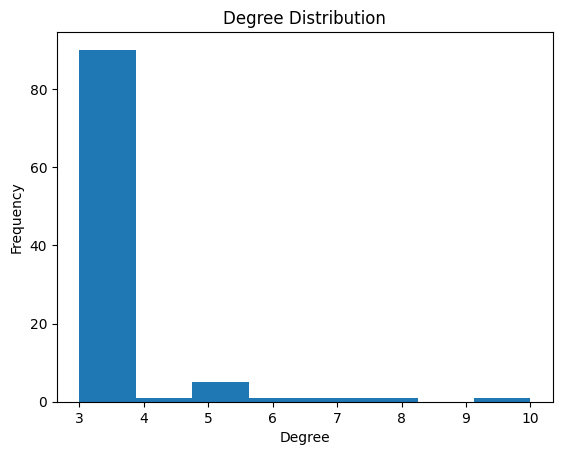

In [61]:
## Test 3:
n = 100
gamma = 2.6
kmin = 3

degree_sequence = generate_degree_sequence(n, gamma, kmin)
print("Degree sequence:", degree_sequence)

# Calculate and print the average degree
average_degree = sum(degree_sequence) / n
print("Average degree:", average_degree)

# Plot the degree distribution histogram
import matplotlib.pyplot as plt
plt.hist(degree_sequence, bins='auto')
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.title("Degree Distribution")
plt.show()

In [52]:
import random
import networkx as nx

def generate_configuration_model(degree_sequence):
    """
    Generates a random graph based on the input of a degree sequence

    It checks if the sum of degrees is odd.

    There should be no double connections and no self connections.

    """
    # Create an empty graph
    G = nx.Graph()

    # Calculate the sum of degrees
    degree_sum = sum(degree_sequence)

    # Print error message if the sum is odd
    if degree_sum % 2 != 0:
        raise ValueError("Degree sum is odd")


    # Create a list of labels based on the degree sequence
    labels = []
    for node, degree in enumerate(degree_sequence):
        labels.extend([node] * degree)
    #print(labels)

    # Randomly shuffle the labels
    random.shuffle(labels)

    # Pair the lables and add edges to the graph
    # check to ensure no link to self
    # do not add edge if it's already in graph

    while len(labels) >= 2:  # At least two labels are required to form an edge
        node1 = labels[-1]
        node2 = labels[-2]
        if node1 != node2 and not G.has_edge(node1, node2):
            G.add_edge(node1, node2)
            labels.pop()
            labels.pop()
        else:
            random.shuffle(labels)

    return G

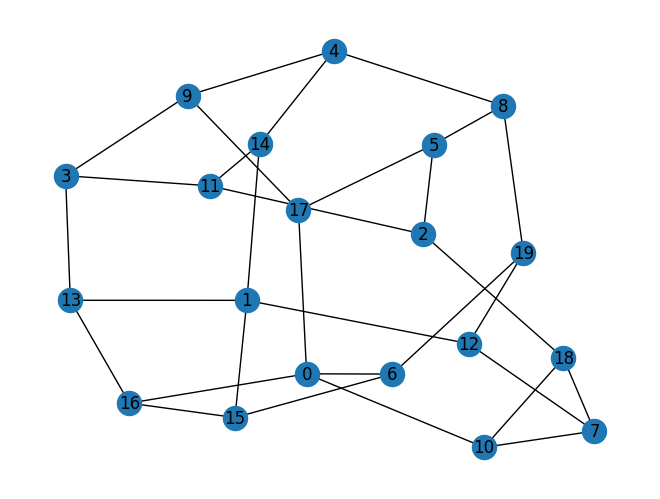

In [56]:
degree_sequence = generate_degree_sequence(20, 2.5, 3)

G = generate_configuration_model(degree_sequence)

# Print the resulting graph's degree sequence
#print("Degree sequence:", list(G.degree()))

# draw the graph
nx.draw(G, with_labels=True)
plt.show()

Degree sequence: [(101, 3), (54, 18), (474, 3), (35, 5), (81, 4), (481, 3), (127, 8), (337, 3), (22, 7), (67, 3), (403, 3), (292, 3), (199, 10), (345, 3), (227, 3), (434, 3), (97, 21), (412, 3), (60, 19), (194, 4), (416, 3), (62, 3), (182, 3), (268, 3), (295, 3), (125, 5), (257, 3), (436, 3), (451, 3), (10, 4), (90, 8), (335, 3), (244, 3), (228, 3), (305, 3), (398, 3), (433, 3), (418, 3), (20, 5), (128, 10), (249, 3), (168, 10), (284, 3), (33, 3), (43, 8), (111, 7), (419, 3), (475, 3), (124, 5), (46, 3), (373, 3), (193, 6), (212, 3), (63, 3), (26, 5), (264, 3), (13, 4), (453, 3), (37, 9), (180, 15), (469, 3), (157, 21), (461, 3), (439, 3), (397, 3), (155, 4), (444, 3), (31, 3), (465, 3), (358, 3), (230, 3), (100, 3), (14, 9), (136, 7), (56, 5), (177, 4), (360, 3), (30, 6), (195, 5), (61, 4), (477, 3), (352, 3), (122, 13), (106, 4), (308, 3), (209, 3), (415, 3), (298, 3), (29, 5), (115, 3), (409, 3), (486, 3), (438, 3), (114, 3), (187, 12), (192, 11), (131, 4), (185, 5), (341, 3), (103,

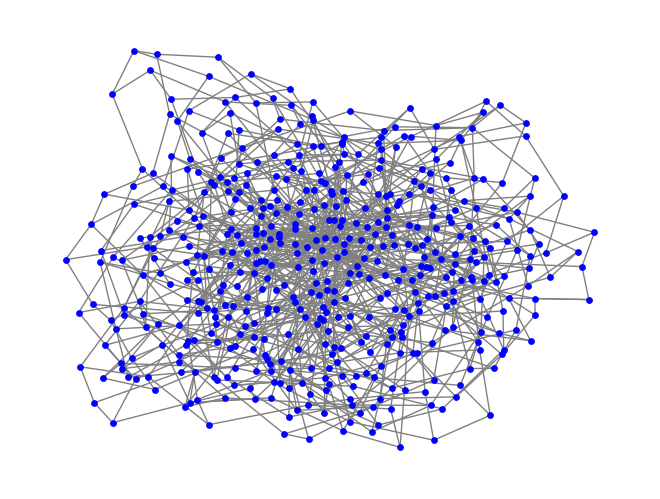

In [50]:
degree_sequence2 = generate_degree_sequence(500, 2.3, 3)

G2 = generate_configuration_model(degree_sequence2)

# Print the resulting graph's degree sequence
print("Degree sequence:", list(G2.degree()))

# draw the graph
nx.draw(G2, node_color="blue", node_size=15, edge_color="grey", width=1, with_labels=False)
plt.show()

Degree sequence: [(834, 3), (294, 7), (1277, 3), (416, 5), (582, 3), (654, 22), (1304, 3), (2310, 3), (969, 3), (1994, 3), (525, 7), (1816, 3), (393, 3), (830, 3), (576, 3), (221, 14), (1874, 3), (606, 3), (2290, 3), (328, 3), (2242, 3), (905, 3), (916, 3), (297, 3), (162, 8), (801, 3), (673, 10), (1156, 3), (280, 3), (106, 7), (2088, 3), (625, 4), (1911, 3), (481, 4), (1976, 3), (596, 5), (110, 22), (141, 3), (601, 4), (185, 9), (1137, 3), (467, 5), (325, 4), (794, 3), (456, 3), (878, 3), (649, 3), (1694, 3), (1398, 3), (2077, 3), (692, 4), (521, 6), (1345, 3), (2132, 3), (1256, 3), (817, 3), (858, 3), (1016, 3), (1486, 3), (1070, 3), (114, 5), (259, 29), (1489, 3), (313, 8), (1604, 3), (1978, 3), (650, 8), (430, 5), (674, 5), (1176, 3), (1643, 3), (907, 3), (1613, 3), (1737, 3), (906, 3), (532, 3), (159, 19), (42, 3), (583, 8), (593, 3), (1194, 3), (730, 4), (122, 4), (519, 3), (2466, 3), (726, 3), (806, 3), (1791, 3), (1121, 3), (2133, 3), (2337, 3), (658, 9), (2320, 3), (1900, 3), 

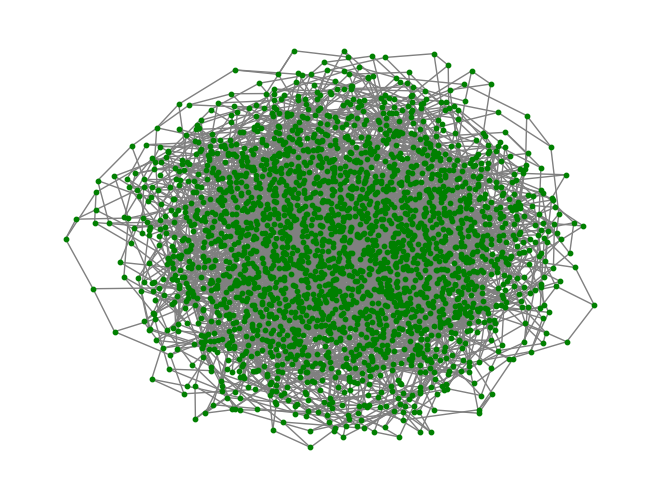

In [59]:
degree_sequence3 = generate_degree_sequence(2500, 2.8, 3)

G3 = generate_configuration_model(degree_sequence3)

# Print the resulting graph's degree sequence
print("Degree sequence:", list(G3.degree()))

# draw the graph
nx.draw(G3, node_color="green", node_size=10, edge_color="grey", width=1, with_labels=False)
plt.show()